## Block 1: Models specification and Pricing PDE

**We already know:**
$$\begin{cases} dM(t)=rM(t)dt\\dS(t)=\mu S(t)dt+\sigma S(t)dW^{\mathbb{P}}(t)\end{cases}$$
And a contingent claim (payoff) of the form: $$\chi=V(S(T),T)$$
The arbitrage free price is given via the Ito's Lemma by $V(S,t)$, where function $V(S,t)$ satisfies the Black-Scholes equation:
$$\begin{cases} \frac{\partial V}{\partial t}+rS\frac{\partial V}{\partial S}+\frac{1}{2}\sigma^2S^2\frac{\partial^2V}{\partial S^2}-rV=0\\V(S,T)=\chi\end{cases}$$

## Block 2: Relation to Monte Carlo via Feynman-Kac Theorem

Then $V(t,S(t))$ is the unique solution of the final condition problem :
$$\begin{cases} \frac{\partial V}{\partial t}+rS\frac{\partial V}{\partial S}+\frac{1}{2}\sigma^2S^2\frac{\partial^2V}{\partial S^2}-rV=0\\V(S,T)=\text{given}\end{cases}$$
This solution can also be obtained as: $$V(t,S(t))=e^{r(T-t)}\mathbb{E}^{\mathbb{P}}\{V(T,S(T))|S(t)\}$$
With the sum of the first derivatives oif the option square integrable. GIven the system of stochastic differential equations:$$dS(t)=r S(t)dt+\sigma S(t)dW^{\mathbb{Q}}(t)$$
Note that $\mu$ is replaced by $r$ and with are now under a risk-free measure, and to turn $dW^{\mathbb{P}}$ to $dW^{\mathbb{Q}}$ then $\frac{S(t)}{M(t)}$ has to be a martingale then $\mu$ turn into $r$

## Block 3: Pricing via Integrals

- Pricing under risk-neutral measure: $$V(t,S(t))=e^{r(T-t)}\mathbb{E}^{\mathbb{Q}}\{V(T,S(T))|S(t)\}$$
- Quadrature: $$V(t,S(t))=\int_{\mathbb{R}}V(T,S(T))f(S(T)|S(t))\space dS(t)$$
- Transitional PDF (density function), $f(S(T)|S(t))$, typically not available, but the characteristic function often is.

## Analytic solution of the Black-Scholes prices

$$
\begin{cases}C(S_t,t) = N(d_1(t,S(t)))S_t -Ke^{r(T-t)}N(d_2(t,S(t))) \\
d_1 = \frac{1}{\sigma\sqrt{T-t}}(log\frac{S(t)}{K}+(r+\frac{1}{2}\sigma^2)(T-t)) \\
d_2 = d_1-\sigma\sqrt{T-t} \\
\end{cases}
$$

Where $N$ is the cumulative distribution function for the standard normal distribution $N(0,1)$. Notice that this equation with always increase depending on the uncertainty (risk) $\sigma$.


# Real world explanation

If we look at options prices using REUTERS for instance, with would notice that the price of the option is slightly different from the option price calculated using the analytic solution of the Black-Scholes model and the historical volatility. This is because the historical volatility is backward looking whereas market is always forward looking. Thus we suppose the existence of the following formula: $$\sigma_{implied}=g_\sigma(V_{c}^{market}, r, T, K, S_0)=g_{\sigma}(.)=BS^{-1}(.)$$


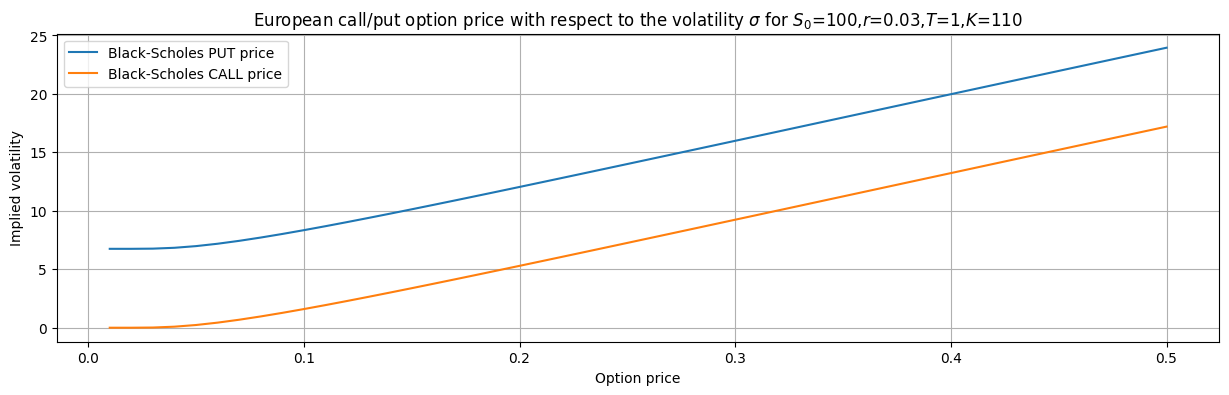

In [1]:
from modules.pricings import black_scholes_option_price
import numpy as np
import matplotlib.pyplot as plt

spot = 100
strike = 110
r = 0.03
tau = 1

volatilities = np.linspace(0.01, 0.5, 50)
bs_call_prices = np.array(
    [
        black_scholes_option_price(spot, strike, r, tau, vol, "call")
        for vol in volatilities
    ]
)
bs_put_prices = np.array(
    [
        black_scholes_option_price(spot, strike, r, tau, vol, "put")
        for vol in volatilities
    ]
)

plt.figure(figsize=(15, 4))
plt.plot(volatilities, bs_put_prices, label="Black-Scholes PUT price")
plt.plot(volatilities, bs_call_prices, label="Black-Scholes CALL price")
plt.grid(True)
plt.ylabel("Implied volatility")
plt.xlabel("Option price")
plt.title(
    f"European call/put option price with respect to the volatility $\sigma$ for $S_0$={spot},$r$={r},$T$={tau},$K$={strike}"
)
plt.legend()

## Finding the implied volatility

The Black-Scholes model and it's analytical formula hasn't a closed-form solution for the $g_{\sigma}(.)$ function. Instead, a root finding technique is used to solve this equation: $$BS(\sigma_{implied}, r, T, K, S_0)-V_{c}^{market}=0$$
There are many ways to solve it, the most popular method is the "Newton" and "Brent" methods. Since the option prices can move very quickly, it is often important to use the most efficient method when calculating the implied volatility.


### Newton's method

- Support an approximation $x_n$. Assume that $g$ is differentiable, and write $\epsilon_n=x_{ex}-x_x$ ,a Taylor series expasnsin gives: $$0=g(x_{ex})=g(x_n)+\epsilon_n g'(x_n)+\frac{\epsilon_n^2}{2}g''(x_n)+...$$
- Ignoring the scond order terms and higher: $$x_{ex}\approx x_n-\frac{g(x_n)}{g'(x_n)}$$
- How fast does the error reduce with this approximation ? WIth on additional term in the Taylor series expansion, we get: $$\epsilon_{n+1}=x_{ex}-x_{n+1}=\epsilon_n+\frac{g(x_n)-g(x_{ex})}{g'(x_n)}\approx-\epsilon_n^2\frac{g''(x_n)}{2g'(x_n)}$$

This method involves starting with an initial guess supposed reasonably close to the true root.
with: $$g'(x_n)=\frac{g(x_n)-0}{x_n-x_{n+1}}=\frac{0-g(x_n)}{x_{n+1}-x_n},\space n=0,1,...$$
_notice that we ignore the $\mathbb{O}(h^2)$ term so we expect the error $x_{n}-x_{ex}$ squares as n increase to $n+1$.<br>_
Giving: $$x_{n+1}=x_n-\frac{g(x_n)}{g'(x_n)},\space n=0,1,...$$
Then replaced with $g(\sigma)=BS(\sigma, .)-V_{c}^{market}$: $$\sigma_{n+1}=\sigma_n-\frac{BS(\sigma_n,.)-V_c^{market}}{\frac{\partial BS(\sigma_n,.)}{\sigma_n}},\space n=0,1,...$$
And we recognize in the denominator, the greek $\nu$: $$\nu=\frac{\partial V}{\partial \sigma}=\frac{\partial BS(\sigma_n,.)}{\sigma_n}$$


In [2]:
from typing import Literal
from modules.pricings import implied_volatility

spot = 100
strike = 120
r = 0.05
tau = 1
market_call_price = 2

starting_sigma = 0.2

implied_volatility(market_call_price, spot, strike, r, tau, starting_sigma, "call")

0.16148272884139442

# Volatility smile (IV shape)

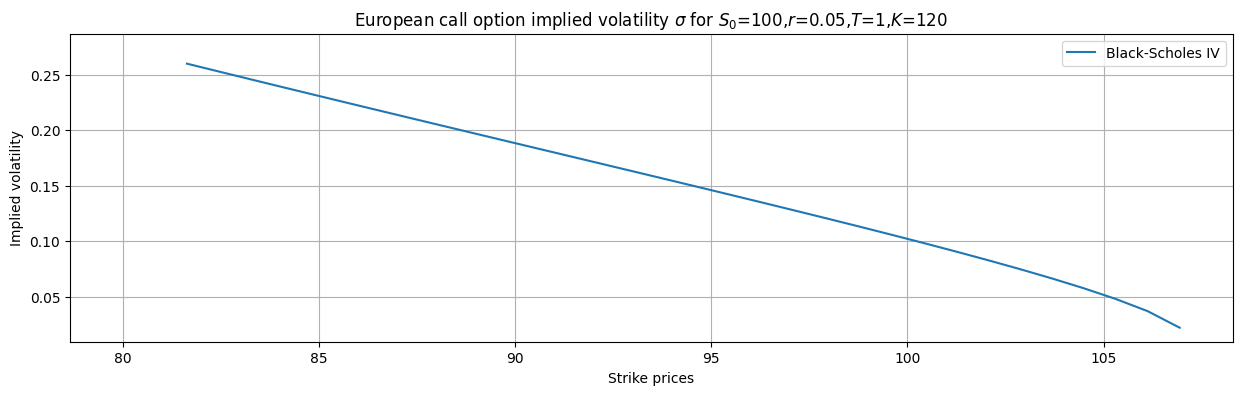

In [8]:
spot = 100
r = 0.05
tau = 1
call_market_price = 2

strikes = np.linspace(80, 120, num=50)

volatilities = np.array([implied_volatility(call_market_price, spot, strike_price, r, tau, 0.1, "put") for strike_price in strikes])

plt.figure(figsize=(15, 4))
plt.plot(strikes, volatilities, label="Black-Scholes IV")
plt.grid(True)
plt.ylabel("Implied volatility")
plt.xlabel("Strike prices")
plt.title(
    f"European call option implied volatility $\sigma$ for $S_0$={spot},$r$={r},$T$={tau},$K$={strike}"
)
plt.legend()
